In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
from shapely import wkt
import os

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
data_dir = '../data'
education = pd.read_csv(os.path.join(data_dir, 'Education_ForModelling.csv'), index_col=0)
education.shape

(2660, 82)

In [3]:
#Function to display at most 1000 rows and at most 1000 columns
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [4]:
display_all(education.head())

,SCH_ID,SCH_NAME,PSGC_PROV,PSGC_MUNI,PSGC_BRGY,LAT,LONG,address_type,geometry,SCH_CAT_CES,SCH_CAT_ES,SCH_CAT_JHS,SCH_CAT_MD,SCH_CAT_PES,SCH_CAT_PJHS,SCH_CAT_PS,SCH_CAT_PSHS,SCH_CAT_SHS,SCH_CAT_SUC,CES_SCH_PROV,ES_SCH_PROV,JHS_SCH_PROV,MD_SCH_PROV,PES_SCH_PROV,PJHS_SCH_PROV,PS_SCH_PROV,PSHS_SCH_PROV,SHS_SCH_PROV,SUC_SCH_PROV,CES_SCH_MUNI,ES_SCH_MUNI,JHS_SCH_MUNI,MD_SCH_MUNI,PES_SCH_MUNI,PJHS_SCH_MUNI,PS_SCH_MUNI,PSHS_SCH_MUNI,SHS_SCH_MUNI,SUC_SCH_MUNI,CES_SCH_BRGY,ES_SCH_BRGY,JHS_SCH_BRGY,MD_SCH_BRGY,PES_SCH_BRGY,PJHS_SCH_BRGY,PS_SCH_BRGY,PSHS_SCH_BRGY,SHS_SCH_BRGY,SUC_SCH_BRGY,BRGY_SCHOOLS,brgy_area,schools_over_brgy_area,MUNI_SCHOOLS,muni_area,schools_over_muni_area,PROV_SCHOOLS,prov_area,schools_over_prov_area,Pop2010,Pop2015,HH_pop,num_hh0,num_hh0_mal,num_hh0_fem,Total_Pop,Male_Pop,Female_Pop,Total_under10,Total_10to20,Total_21to30,Total_31to60,Total_over60,Female_under10,Female_10to20,Female_21to30,Female_31to60,Female_over60,Male_under10,Male_10to20,Male_21to30,Male_31to60,Male_over60
0,133049,Abong-Abong ES,PH150700000,PH150704000,PH150704001,6.507703,121.910937,given,POINT (121.910937 6.507703),0,1,0,0,0,0,0,0,0,0,16.0,171.0,16.0,1.0,6.0,0.0,14.0,6.0,10.0,1.0,2.0,16.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,4.590691,0.435664,20,88.732750,0.225396,241,1156.417926,0.208402,846.0,965.0,965.0,176.0,155.0,21.0,965.0,473.0,492.0,297.0,245.0,152.0,222.0,49.0,144.0,134.0,85.0,104.0,25.0,153.0,111.0,67.0,118.0,24.0
1,215015,Akbar ES,PH150700000,PH150708000,PH150708008,6.664125,122.195725,given,POINT (122.195725 6.664125),0,1,0,0,0,0,0,0,0,0,16.0,171.0,16.0,1.0,6.0,0.0,14.0,6.0,10.0,1.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.797243,1.112815,7,31.433729,0.222691,241,1156.417926,0.208402,642.0,1093.0,1093.0,175.0,135.0,40.0,1093.0,520.0,573.0,300.0,303.0,134.0,308.0,48.0,134.0,153.0,72.0,185.0,29.0,166.0,150.0,62.0,123.0,19.0
2,133154,Amaloy ES,PH150700000,PH150711000,PH150711001,6.443614,122.126717,given,POINT (122.126717 6.443614),0,1,0,0,0,0,0,0,0,0,16.0,171.0,16.0,1.0,6.0,0.0,14.0,6.0,10.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.478142,0.287510,13,71.247126,0.182463,241,1156.417926,0.208402,980.0,1129.0,1129.0,191.0,187.0,4.0,1129.0,586.0,543.0,329.0,284.0,154.0,318.0,44.0,136.0,143.0,91.0,153.0,20.0,193.0,141.0,63.0,165.0,24.0
3,133023,Atong-Atong ES,PH150700000,PH150703000,PH150703001,6.660000,121.899633,given,POINT (121.899633 6.66),0,1,0,0,0,0,0,0,0,0,16.0,171.0,16.0,1.0,6.0,0.0,14.0,6.0,10.0,1.0,1.0,18.0,2.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,5.649323,0.354025,24,152.681422,0.157190,241,1156.417926,0.208402,1155.0,2368.0,2368.0,419.0,367.0,52.0,2368.0,1173.0,1195.0,594.0,621.0,377.0,661.0,115.0,297.0,295.0,196.0,342.0,65.0,297.0,326.0,181.0,319.0,50.0
4,133081,Babag ES,PH150700000,PH150713000,PH150713001,6.342007,121.954045,given,POINT (121.954045 6.342007),0,1,0,0,0,0,0,0,0,0,16.0,171.0,16.0,1.0,6.0,0.0,14.0,6.0,10.0,1.0,1.0,11.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.570479,0.389033,16,28.023131,0.570957,241,1156.417926,0.208402,1799.0,2179.0,2179.0,313.0,301.0,12.0,2179.0,1083.0,1096.0,569.0,768.0,320.0,469.0,53.0,280.0,392.0,155.0,239.0,30.0,289.0,376.0,165.0,230.0,23.0


In [5]:
display_all(education.dtypes)

SCH_ID                      int64
SCH_NAME                   object
PSGC_PROV                  object
PSGC_MUNI                  object
PSGC_BRGY                  object
LAT                       float64
LONG                      float64
address_type               object
geometry                   object
SCH_CAT_CES                 int64
SCH_CAT_ES                  int64
SCH_CAT_JHS                 int64
SCH_CAT_MD                  int64
SCH_CAT_PES                 int64
SCH_CAT_PJHS                int64
SCH_CAT_PS                  int64
SCH_CAT_PSHS                int64
SCH_CAT_SHS                 int64
SCH_CAT_SUC                 int64
CES_SCH_PROV              float64
ES_SCH_PROV               float64
JHS_SCH_PROV              float64
MD_SCH_PROV               float64
PES_SCH_PROV              float64
PJHS_SCH_PROV             float64
PS_SCH_PROV               float64
PSHS_SCH_PROV             float64
SHS_SCH_PROV              float64
SUC_SCH_PROV              float64
CES_SCH_MUNI  

In [6]:
# Change df to geodataframe
education['geometry'] = education['geometry'].apply(wkt.loads)
education = gpd.GeoDataFrame(education, geometry='geometry')

<AxesSubplot:>

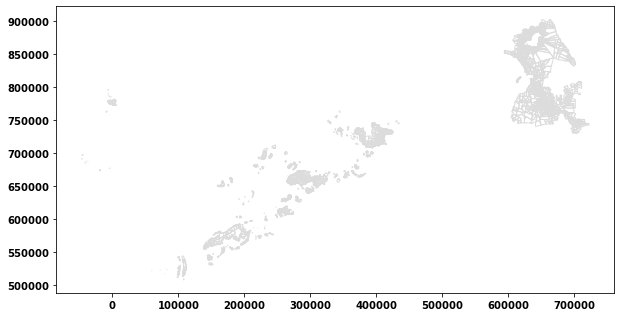

In [7]:
# Read barangay-level admin boundaries from shp file
brgy_dir = '../data/Administrative Boundaries - BARMM Barangays ao 20190206 (PSA 2016)'
brgy_file = 'AdministrativeBoundariesBARMMBarangays20190206PSA2016.shp'
brgy_bounds = gpd.read_file(os.path.join(brgy_dir, brgy_file))

# Visualize bounds
brgy_bounds['geometry'].plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

In [8]:
# Add the centroid of each city / municipality
brgy_bounds['centroid'] = brgy_bounds['geometry'].centroid

# Change coordinate reference system to 4326 (lat/long)
brgy_bounds['geometry'] = brgy_bounds['geometry'].to_crs(epsg=4326)
brgy_bounds['centroid'] = brgy_bounds['centroid'].to_crs(epsg=4326)

brgy_bounds['lon'] = brgy_bounds['centroid'].x
brgy_bounds['lat'] = brgy_bounds['centroid'].y
display_all(brgy_bounds.head())

,Reg_Code,Reg_Name,Pro_Code,Pro_Name,Mun_Code,Mun_Name,Bgy_Code,Bgy_Name,geometry,centroid,lon,lat
0,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH157000000,TAWI-TAWI,PH157001000,PANGLIMA SUGALA (BALIMBING),PH157001001,Balimbing Proper,"MULTIPOLYGON (((119.95374 5.07851, 119.95384 5...",POINT (119.96552 5.09753),119.965518,5.097532
1,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH157000000,TAWI-TAWI,PH157001000,PANGLIMA SUGALA (BALIMBING),PH157001002,Batu-batu (Pob.),"POLYGON ((119.88709 5.06919, 119.88709 5.06920...",POINT (119.88302 5.09129),119.883020,5.091289
2,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH157000000,TAWI-TAWI,PH157001000,PANGLIMA SUGALA (BALIMBING),PH157001003,Buan,"MULTIPOLYGON (((120.06363 5.16131, 120.06365 5...",POINT (120.00070 5.15760),120.000703,5.157595
3,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH157000000,TAWI-TAWI,PH157001000,PANGLIMA SUGALA (BALIMBING),PH157001004,Dungon,"POLYGON ((120.13585 5.19601, 120.13584 5.19603...",POINT (120.12350 5.21772),120.123501,5.217723
4,PH150000000,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),PH157000000,TAWI-TAWI,PH157001000,PANGLIMA SUGALA (BALIMBING),PH157001005,Luuk Buntal,"MULTIPOLYGON (((119.98776 4.98564, 119.98774 4...",POINT (120.00454 4.98161),120.004538,4.981608


In [9]:
len(brgy_bounds[brgy_bounds['centroid'].within(brgy_bounds['geometry'])==True])

2527

In [10]:
# Some centroids are outside the brgy bounds maybe due to islands
len(brgy_bounds[brgy_bounds['centroid'].within(brgy_bounds['geometry'])==False])

62

In [11]:
len(brgy_bounds)

2589

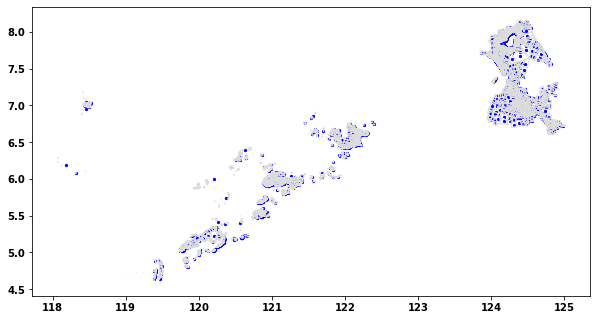

In [12]:
ax = brgy_bounds['geometry'].plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)
brgy_bounds['centroid'].plot(figsize=(10,10), color='b', markersize=5, ax=ax)
plt.show()

In [14]:
schools = education[['SCH_NAME',
                    'PSGC_BRGY',
                    'PSGC_MUNI',
                    'PSGC_PROV',
                    'LAT',
                    'LONG',
                    'geometry']]
schools

,SCH_NAME,PSGC_BRGY,PSGC_MUNI,PSGC_PROV,LAT,LONG,geometry
0,Abong-Abong ES,PH150704001,PH150704000,PH150700000,6.507703,121.910937,POINT (121.91094 6.50770)
1,Akbar ES,PH150708008,PH150708000,PH150700000,6.664125,122.195725,POINT (122.19572 6.66413)
2,Amaloy ES,PH150711001,PH150711000,PH150700000,6.443614,122.126717,POINT (122.12672 6.44361)
3,Atong-Atong ES,PH150703001,PH150703000,PH150700000,6.660000,121.899633,POINT (121.89963 6.66000)
4,Babag ES,PH150713001,PH150713000,PH150700000,6.342007,121.954045,POINT (121.95404 6.34201)
...,...,...,...,...,...,...,...
2655,D and M Little Garden Preparatory School Incor...,PH153617131,PH153617000,PH153600000,8.018355,124.301884,POINT (124.30188 8.01835)
2656,Al Bangsamoro Shari'ah and Professional Educat...,PH153617141,PH153617000,PH153600000,8.003102,124.281586,POINT (124.28159 8.00310)
2657,"Al-Farabi International Academy-MSU, Inc",PH153617039,PH153617000,PH153600000,7.961599,124.248064,POINT (124.24806 7.96160)
2658,Mindanao State University-Tawi Tawi,PH157002030,PH157003000,PH157000000,6.981432,118.501654,POINT (118.50165 6.98143)


In [15]:
# Keep only one record for each brgy
brgy_info = education[['PSGC_BRGY',
        'PSGC_MUNI',
        'PSGC_PROV',
        'CES_SCH_BRGY',
        'ES_SCH_BRGY',
        'JHS_SCH_BRGY',
        'MD_SCH_BRGY',
        'PES_SCH_BRGY',
        'PJHS_SCH_BRGY',
        'PS_SCH_BRGY',
        'PSHS_SCH_BRGY',
        'SHS_SCH_BRGY',
        'SUC_SCH_BRGY',
        'BRGY_SCHOOLS',
        'brgy_area',
        'Total_under10',
        'Total_10to20',
        'Total_31to60']].drop_duplicates(subset='PSGC_BRGY', keep='first')

brgy_info

,PSGC_BRGY,PSGC_MUNI,PSGC_PROV,CES_SCH_BRGY,ES_SCH_BRGY,JHS_SCH_BRGY,MD_SCH_BRGY,PES_SCH_BRGY,PJHS_SCH_BRGY,PS_SCH_BRGY,PSHS_SCH_BRGY,SHS_SCH_BRGY,SUC_SCH_BRGY,BRGY_SCHOOLS,brgy_area,Total_under10,Total_10to20,Total_31to60
0,PH150704001,PH150704000,PH150700000,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,4.590691,297.0,245.0,222.0
1,PH150708008,PH150708000,PH150700000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1.797243,300.0,303.0,308.0
2,PH150711001,PH150711000,PH150700000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3.478142,329.0,284.0,318.0
3,PH150703001,PH150703000,PH150700000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,5.649323,594.0,621.0,661.0
4,PH150713001,PH150713000,PH150700000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.570479,569.0,768.0,469.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,PH153808040,PH153808000,PH153800000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,7.786553,347.0,405.0,268.0
2620,PH153630012,PH153630000,PH153600000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.548347,457.0,469.0,707.0
2633,PH153617077,PH153617000,PH153600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.416234,1449.0,1643.0,1327.0
2639,PH153617116,PH153617000,PH153600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.024023,985.0,604.0,560.0


In [16]:
brgy_df = brgy_bounds[['Bgy_Code', 'geometry', 'centroid', 'lon', 'lat']].merge(brgy_info, how='left', left_on='Bgy_Code', right_on='PSGC_BRGY')
brgy_df.head()

,Bgy_Code,geometry,centroid,lon,lat,PSGC_BRGY,PSGC_MUNI,PSGC_PROV,CES_SCH_BRGY,ES_SCH_BRGY,...,PJHS_SCH_BRGY,PS_SCH_BRGY,PSHS_SCH_BRGY,SHS_SCH_BRGY,SUC_SCH_BRGY,BRGY_SCHOOLS,brgy_area,Total_under10,Total_10to20,Total_31to60
0,PH157001001,"MULTIPOLYGON (((119.95374 5.07851, 119.95384 5...",POINT (119.96552 5.09753),119.965518,5.097532,PH157001001,PH157001000,PH157000000,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,3.0,15.158874,1406.0,1388.0,1168.0
1,PH157001002,"POLYGON ((119.88709 5.06919, 119.88709 5.06920...",POINT (119.88302 5.09129),119.883020,5.091289,PH157001002,PH157001000,PH157000000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2.0,8.254003,851.0,837.0,880.0
2,PH157001003,"MULTIPOLYGON (((120.06363 5.16131, 120.06365 5...",POINT (120.00070 5.15760),120.000703,5.157595,PH157001003,PH157001000,PH157000000,0.0,2.0,...,0.0,3.0,0.0,0.0,1.0,6.0,47.332403,1021.0,1101.0,969.0
3,PH157001004,"POLYGON ((120.13585 5.19601, 120.13584 5.19603...",POINT (120.12350 5.21772),120.123501,5.217723,PH157001004,PH157001000,PH157000000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,55.353446,538.0,450.0,520.0
4,PH157001005,"MULTIPOLYGON (((119.98776 4.98564, 119.98774 4...",POINT (120.00454 4.98161),120.004538,4.981608,PH157001005,PH157001000,PH157000000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,2.0,6.286992,747.0,533.0,509.0


In [17]:
brgy_df.shape

(2589, 23)

In [18]:
# Checking % missing values
brgy_df.isnull().sum() * 100 / len(brgy_df)

Bgy_Code          0.000000
geometry          0.000000
centroid          0.000000
lon               0.000000
lat               0.000000
PSGC_BRGY        39.358826
PSGC_MUNI        39.358826
PSGC_PROV        39.358826
CES_SCH_BRGY     39.358826
ES_SCH_BRGY      39.358826
JHS_SCH_BRGY     39.358826
MD_SCH_BRGY      39.358826
PES_SCH_BRGY     39.358826
PJHS_SCH_BRGY    39.358826
PS_SCH_BRGY      39.358826
PSHS_SCH_BRGY    39.358826
SHS_SCH_BRGY     39.358826
SUC_SCH_BRGY     39.358826
BRGY_SCHOOLS     39.358826
brgy_area        39.358826
Total_under10    42.873696
Total_10to20     42.873696
Total_31to60     42.873696
dtype: float64

In [19]:
# Number of brgys from admin bounds
print(len(brgy_bounds))

# Number of brgys from school info
print(len(brgy_info))

2589
1570


In [20]:
# % brgys with no school info
1-(len(brgy_info)/len(brgy_bounds))

0.39358825801467745

In [21]:
# Drop brgys with missing values
brgy_df.dropna(axis=0, how='any', inplace=True)

In [22]:
display_all(brgy_df.head())

,Bgy_Code,geometry,centroid,lon,lat,PSGC_BRGY,PSGC_MUNI,PSGC_PROV,CES_SCH_BRGY,ES_SCH_BRGY,JHS_SCH_BRGY,MD_SCH_BRGY,PES_SCH_BRGY,PJHS_SCH_BRGY,PS_SCH_BRGY,PSHS_SCH_BRGY,SHS_SCH_BRGY,SUC_SCH_BRGY,BRGY_SCHOOLS,brgy_area,Total_under10,Total_10to20,Total_31to60
0,PH157001001,"MULTIPOLYGON (((119.95374 5.07851, 119.95384 5...",POINT (119.96552 5.09753),119.965518,5.097532,PH157001001,PH157001000,PH157000000,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,15.158874,1406.0,1388.0,1168.0
1,PH157001002,"POLYGON ((119.88709 5.06919, 119.88709 5.06920...",POINT (119.88302 5.09129),119.883020,5.091289,PH157001002,PH157001000,PH157000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,8.254003,851.0,837.0,880.0
2,PH157001003,"MULTIPOLYGON (((120.06363 5.16131, 120.06365 5...",POINT (120.00070 5.15760),120.000703,5.157595,PH157001003,PH157001000,PH157000000,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,6.0,47.332403,1021.0,1101.0,969.0
3,PH157001004,"POLYGON ((120.13585 5.19601, 120.13584 5.19603...",POINT (120.12350 5.21772),120.123501,5.217723,PH157001004,PH157001000,PH157000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,55.353446,538.0,450.0,520.0
4,PH157001005,"MULTIPOLYGON (((119.98776 4.98564, 119.98774 4...",POINT (120.00454 4.98161),120.004538,4.981608,PH157001005,PH157001000,PH157000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,6.286992,747.0,533.0,509.0


# Modeling

## Municipality-level K-means clustering using total number of schools only as weights

In [23]:
brgy_df.shape

(1479, 23)

In [24]:
brgy_df['PSGC_MUNI'].value_counts()

PH156612000    39
PH150702000    38
PH156613000    37
PH157002000    33
PH153617000    33
               ..
PH153632000     4
PH153837000     4
PH153827000     3
PH153640000     2
PH157008000     1
Name: PSGC_MUNI, Length: 118, dtype: int64

In [25]:
brgy_df[brgy_df['PSGC_MUNI']=='PH156612000']

,Bgy_Code,geometry,centroid,lon,lat,PSGC_BRGY,PSGC_MUNI,PSGC_PROV,CES_SCH_BRGY,ES_SCH_BRGY,...,PJHS_SCH_BRGY,PS_SCH_BRGY,PSHS_SCH_BRGY,SHS_SCH_BRGY,SUC_SCH_BRGY,BRGY_SCHOOLS,brgy_area,Total_under10,Total_10to20,Total_31to60
399,PH156612004,"POLYGON ((120.88779 5.55785, 120.88777 5.55784...",POINT (120.87607 5.55412),120.876072,5.554119,PH156612004,PH156612000,PH156600000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.470929,782.0,648.0,630.0
401,PH156612007,"POLYGON ((120.90758 5.51046, 120.90540 5.50911...",POINT (120.90626 5.51039),120.906263,5.510387,PH156612007,PH156612000,PH156600000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.032376,210.0,194.0,244.0
402,PH156612008,"POLYGON ((120.84518 5.56720, 120.84303 5.55455...",POINT (120.83799 5.56195),120.837987,5.561954,PH156612008,PH156612000,PH156600000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.407239,484.0,606.0,584.0
403,PH156612009,"MULTIPOLYGON (((120.81909 5.54996, 120.81913 5...",POINT (120.82974 5.55071),120.829741,5.550706,PH156612009,PH156612000,PH156600000,1.0,2.0,...,0.0,1.0,1.0,0.0,0.0,6.0,2.587061,1248.0,1261.0,1181.0
404,PH156612010,"POLYGON ((120.89415 5.55155, 120.89408 5.55050...",POINT (120.88756 5.54336),120.887558,5.543361,PH156612010,PH156612000,PH156600000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,4.261222,780.0,573.0,556.0
405,PH156612011,"MULTIPOLYGON (((120.87593 5.60059, 120.87595 5...",POINT (120.87471 5.59663),120.874707,5.596629,PH156612011,PH156612000,PH156600000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.467633,292.0,298.0,226.0
406,PH156612012,"POLYGON ((120.85162 5.56558, 120.85239 5.54372...",POINT (120.84834 5.55756),120.848343,5.557563,PH156612012,PH156612000,PH156600000,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,2.0,1.616235,237.0,308.0,372.0
408,PH156612015,"MULTIPOLYGON (((120.88953 5.50924, 120.88954 5...",POINT (120.88424 5.50844),120.884239,5.508443,PH156612015,PH156612000,PH156600000,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,2.063453,206.0,167.0,255.0
409,PH156612016,"POLYGON ((120.84941 5.53107, 120.84217 5.50947...",POINT (120.84105 5.52003),120.841048,5.520031,PH156612016,PH156612000,PH156600000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,2.0,2.645753,238.0,186.0,252.0
410,PH156612018,"MULTIPOLYGON (((120.86308 5.48946, 120.86297 5...",POINT (120.86016 5.49684),120.860156,5.496836,PH156612018,PH156612000,PH156600000,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.702896,281.0,288.0,205.0


In [26]:
# Parameters
k = 10
n_init = 10
max_iter = 100

X = list(zip(brgy_df[brgy_df['PSGC_MUNI']=='PH156612000']['lon'], brgy_df[brgy_df['PSGC_MUNI']=='PH156612000']['lat']))
weights = brgy_df[brgy_df['PSGC_MUNI']=='PH156612000']['BRGY_SCHOOLS']

kmeans = KMeans(n_clusters=k, n_init=n_init, max_iter=max_iter, 
                random_state=18).fit(X, sample_weight=weights)

In [27]:
# Predicted facility locations based on centers
kmeans.cluster_centers_

array([[120.85281139,   5.54010433],
       [120.89879918,   5.53667748],
       [120.85658737,   5.4860548 ],
       [120.85976723,   5.5597254 ],
       [120.92206289,   5.55055677],
       [120.83044145,   5.55387765],
       [120.89029132,   5.50310072],
       [120.85068862,   5.58449154],
       [120.83054343,   5.52616982],
       [120.86477775,   5.51876238]])

In [28]:
# Sum of squared distances of data points to their closest cluster center
kmeans.inertia_

0.006425620415891017

In [29]:
# Predicted cluster center for each data point
kmeans.labels_

array([3, 6, 5, 5, 1, 7, 3, 6, 8, 2, 4, 2, 0, 4, 1, 3, 3, 9, 5, 2, 1, 0,
       0, 8, 6, 3, 9, 9, 7, 1, 1, 8, 6, 8, 4, 4, 2, 9, 7])

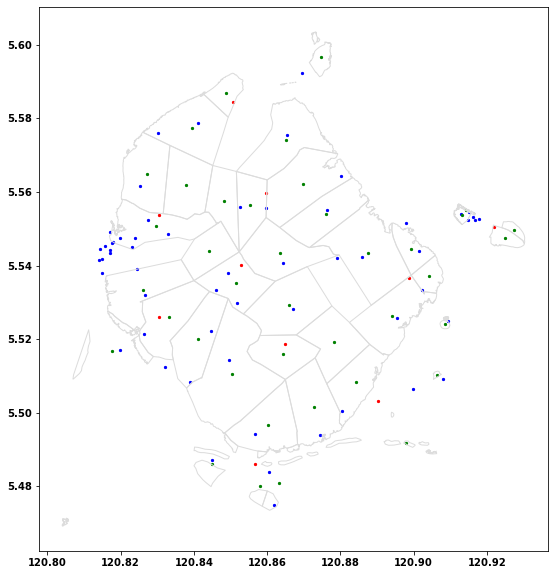

In [30]:
lon = [center[0] for center in kmeans.cluster_centers_]
lat = [center[1] for center in kmeans.cluster_centers_]
cluster_centers = gpd.GeoDataFrame(geometry=gpd.points_from_xy(lon, lat))

# Visualizing cluster centers
ax = brgy_df[brgy_df['PSGC_MUNI']=='PH156612000']['geometry'].plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)
cluster_centers.plot(figsize=(10,10), color='r', markersize=5, ax=ax) # suggested locations
schools[schools['PSGC_MUNI']=='PH156612000']['geometry'].plot(figsize=(10,10), color='b', markersize=5, ax=ax) # existing schools
brgy_df[brgy_df['PSGC_MUNI']=='PH156612000']['centroid'].plot(figsize=(10,10), color='g', markersize=5, ax=ax) # brgy centroids
plt.show()

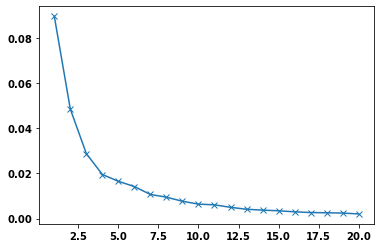

In [31]:
# Elbow method to find ideal k

# Parameters
n_init = 10
max_iter = 100

X = list(zip(brgy_df[brgy_df['PSGC_MUNI']=='PH156612000']['lon'], brgy_df[brgy_df['PSGC_MUNI']=='PH156612000']['lat']))
weights = brgy_df[brgy_df['PSGC_MUNI']=='PH156612000']['BRGY_SCHOOLS']

inertias = []
for k in range(1,21):
    kmeans = KMeans(n_clusters=k, n_init=n_init, max_iter=max_iter, 
                random_state=18).fit(X, sample_weight=weights)
    inertias.append(kmeans.inertia_)

fig, ax = plt.subplots()
ax.plot(range(1,21), inertias, 'x-')
plt.show()

# Elbow somewhere around 3?

In [32]:
# Silhouette score to find ideal k
for k in range(2,21):
    labels = KMeans(n_clusters=k, n_init=n_init, max_iter=max_iter, 
                random_state=18).fit_predict(X, sample_weight=weights)
    avg = silhouette_score(X, labels)
    print("For k=%d, the score is %g"%(k,avg))
    
# The closer 1 the silhouette score is, the better
# Thus, ideal k = 3

For k=2, the score is 0.340813
For k=3, the score is 0.41203
For k=4, the score is 0.378852
For k=5, the score is 0.345633
For k=6, the score is 0.293709
For k=7, the score is 0.346778
For k=8, the score is 0.346349
For k=9, the score is 0.364393
For k=10, the score is 0.340896
For k=11, the score is 0.329367
For k=12, the score is 0.317501
For k=13, the score is 0.331983
For k=14, the score is 0.332118
For k=15, the score is 0.326414
For k=16, the score is 0.332243
For k=17, the score is 0.284901
For k=18, the score is 0.307899
For k=19, the score is 0.263596
For k=20, the score is 0.294259


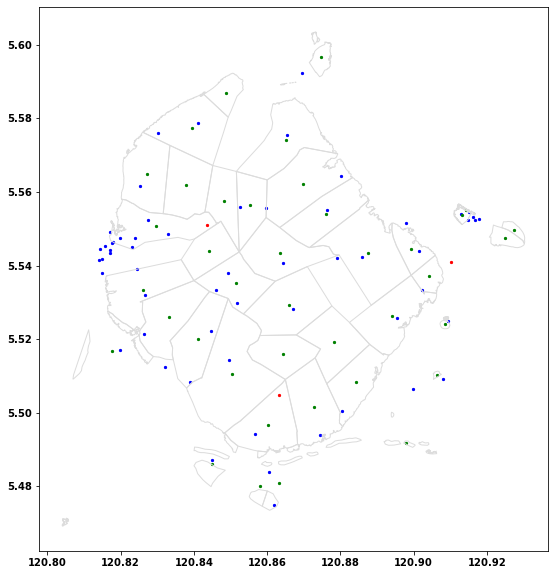

In [33]:
# Parameters
k = 3
n_init = 10
max_iter = 100

X = list(zip(brgy_df[brgy_df['PSGC_MUNI']=='PH156612000']['lon'], brgy_df[brgy_df['PSGC_MUNI']=='PH156612000']['lat']))
weights = brgy_df[brgy_df['PSGC_MUNI']=='PH156612000']['BRGY_SCHOOLS']

kmeans = KMeans(n_clusters=k, n_init=n_init, max_iter=max_iter, 
                random_state=18).fit(X, sample_weight=weights)

lon = [center[0] for center in kmeans.cluster_centers_]
lat = [center[1] for center in kmeans.cluster_centers_]
cluster_centers = gpd.GeoDataFrame(geometry=gpd.points_from_xy(lon, lat))

# Visualizing cluster centers
ax = brgy_df[brgy_df['PSGC_MUNI']=='PH156612000']['geometry'].plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)
cluster_centers.plot(figsize=(10,10), color='r', markersize=5, ax=ax) # suggested locations
schools[schools['PSGC_MUNI']=='PH156612000']['geometry'].plot(figsize=(10,10), color='b', markersize=5, ax=ax) # existing schools
brgy_df[brgy_df['PSGC_MUNI']=='PH156612000']['centroid'].plot(figsize=(10,10), color='g', markersize=5, ax=ax) # brgy centroids
plt.show()

## K-means clustering using multiple features

1. Scale features
2. Reduce dimensions of features into 1 using PCA
3. Use PCA-reduced 1D feature weight for K-means clustering

In [34]:
feat = ['BRGY_SCHOOLS', 'brgy_area', 'Total_under10', 'Total_10to20', 'Total_31to60']

In [35]:
brgy_df_feat = brgy_df[brgy_df['PSGC_MUNI']=='PH156612000'][feat]
brgy_df_feat.shape

(39, 5)

In [36]:
# Scale features before PCA
scaled_brgy_df_feat = scale(brgy_df_feat)

In [37]:
scaled_brgy_df_feat

array([[-0.52375195,  0.46018077,  1.41806909,  0.80379628,  1.13195441],
       [-0.52375195, -1.33156345, -0.81756944, -0.75861638, -0.67451667],
       [-0.52375195,  0.41338413,  0.25334831,  0.6592559 ,  0.91667548],
       [ 4.85159705,  0.54551003,  3.23941097,  2.9133975 ,  3.71062168],
       [-0.52375195,  1.77561197,  1.41025217,  0.54568846,  0.78563612],
       [-0.52375195, -1.01175483, -0.49707581, -0.40070687, -0.75875625],
       [ 0.55131785, -0.16781147, -0.71204105, -0.3662925 , -0.07547963],
       [-0.52375195,  0.16078487, -0.83320328, -0.85153519, -0.62303692],
       [ 0.55131785,  0.58863448, -0.70813259, -0.78614788, -0.63707686],
       [-0.52375195,  0.63062023, -0.54006886, -0.43512125, -0.85703577],
       [ 0.55131785, -1.03153103,  0.06183383, -0.31467093, -0.52007743],
       [-0.52375195, -1.1392829 , -0.66513954, -0.33531956, -0.60899699],
       [ 0.55131785, -0.15402309, -0.71985797, -0.43856268, -0.45923773],
       [-0.52375195, -1.23578138, -0.6

In [38]:
# PCA dimension reduction of features into 1D weight
pca = PCA(n_components=1).fit(scaled_brgy_df_feat)
weights = pca.transform(scaled_brgy_df_feat)

In [39]:
np.shape(weights)

(39, 1)

In [40]:
np.concatenate(weights)

array([ 1.62099312, -1.63941897,  0.83189592,  7.13884529,  1.56795502,
       -1.27495518, -0.40421324, -1.36338014, -0.76257037, -1.032742  ,
       -0.3993017 , -1.27269459, -0.64766214, -1.57660477,  2.11105044,
       -0.36916657,  1.70943922, -0.86928428,  2.0356842 , -1.37872421,
       -1.97737243, -0.39577509,  1.21627936, -0.69565503, -0.76238771,
       -1.14918692, -1.11289545,  0.9995711 , -1.69811803, -0.04342042,
       -0.48225517, -1.35376918, -1.15843204,  3.78672464, -0.45257534,
        1.66153002, -1.45073114, -1.22573127,  2.26905505])

In [44]:
# Parameters
k = 3
n_init = 10
max_iter = 100

X = list(zip(brgy_df[brgy_df['PSGC_MUNI']=='PH156612000']['lon'], brgy_df[brgy_df['PSGC_MUNI']=='PH156612000']['lat']))

kmeans = KMeans(n_clusters=k, n_init=n_init, max_iter=max_iter, 
                random_state=18).fit(X, sample_weight=np.concatenate(weights))

C:\Users\ROSIEL\anaconda3\lib\site-packages\ipykernel_launcher.py:9: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  if __name__ == '__main__':


In [45]:
# Predicted facility locations based on centers
print(kmeans.cluster_centers_)

# Sum of squared distances of data points to their closest cluster center
print(kmeans.inertia_)

# Predicted cluster center for each data point
print(kmeans.labels_)

[[120.87520164   5.60428851]
 [120.683882     5.67207263]
 [120.80102013   5.61547051]]
-0.09161106524996064
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0
 0 0]


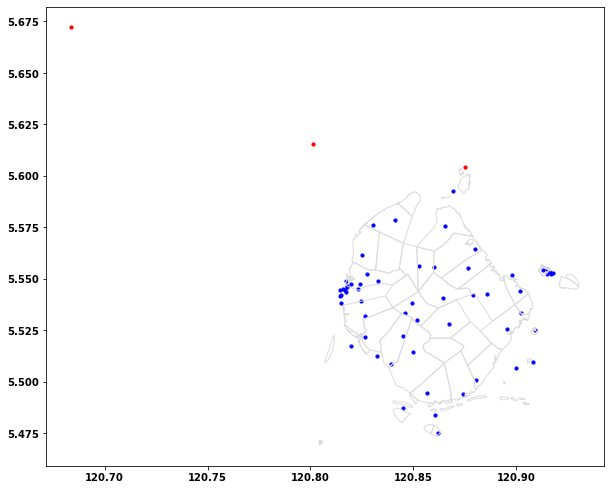

In [46]:
lon = [center[0] for center in kmeans.cluster_centers_]
lat = [center[1] for center in kmeans.cluster_centers_]
cluster_centers = gpd.GeoDataFrame(geometry=gpd.points_from_xy(lon, lat))

# Visualizing cluster centers
ax = brgy_df[brgy_df['PSGC_MUNI']=='PH156612000']['geometry'].plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)
cluster_centers.plot(figsize=(10,10), color='r', markersize=10, ax=ax) # suggested locations
schools[schools['PSGC_MUNI']=='PH156612000']['geometry'].plot(figsize=(10,10), color='b', markersize=10, ax=ax) # existing schools
plt.show()

Even if data points are brgys and k-means clustering is done for just one municipality, the suggested cluster centers go beyond the municipality boundaries when multiple features are included.

# To-do next
1. Use DBSCAN
2. Include distance to nearest school as feature (?)
3. Use Haversine distance for location data and Euclidean distance for other features

## Municipality-level DBSCAN clustering using only location data

In [89]:
from sklearn.cluster import DBSCAN
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

# Haversine - Angular distance between 2 points on the surface of a sphere
from sklearn.metrics.pairwise import haversine_distances, euclidean_distances
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.haversine_distances.html

In [48]:
eps = 1
min_samples = 4

X = brgy_df[brgy_df['PSGC_MUNI']=='PH156612000'][['lat','lon']]

#X = list(zip(brgy_df[brgy_df['PSGC_MUNI']=='PH156612000']['lon'], brgy_df[brgy_df['PSGC_MUNI']=='PH156612000']['lat']))

db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
labels = db.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [49]:
np.array(X).shape

(39, 2)

In [51]:
X.head()

,lat,lon
399,5.554119,120.876072
401,5.510387,120.906263
402,5.561954,120.837987
403,5.550706,120.829741
404,5.543361,120.887558


In [54]:
from math import radians

X['lat'] = [radians(x) for x in X['lat']]
X['lon'] = [radians(x) for x in X['lon']]
X.head()

,lat,lon
399,0.096938,2.109685
401,0.096174,2.110212
402,0.097074,2.109021
403,0.096878,2.108877
404,0.096750,2.109886


In [198]:
X.head()

,lat,lon
399,0.096938,2.109685
401,0.096174,2.110212
402,0.097074,2.109021
403,0.096878,2.108877
404,0.096750,2.109886


In [205]:
loc_0 = [X.iloc[0]['lat'], X.iloc[0]['lon']]
loc_1 = [X.iloc[1]['lat'], X.iloc[1]['lon']]
haversine_distances([loc_0, loc_1])

array([[0.       , 0.0009261],
       [0.0009261, 0.       ]])

In [75]:
# Calculate distance of k nearest neighbor of each point
def calculate_knn_distances(X):
    
    knn_distances = []
    
    for i, row in X.iterrows():
        haversine = []
        # print(i)
        
        for j, row2 in X.iterrows():
            # print(j)
            dist = haversine_distances([row, row2]) # Haversine distance is for distance between points with lat/lon
            # print(dist)
            haversine.append(dist[0,1])
        
        haversine.sort() # sort distances in ascending order
        # print(haversine)
        knn_distances.append(haversine[1]) # distance to nearest point, distance at index 0 is distance with itself
    
    return knn_distances

In [76]:
print(calculate_knn_distances(X.head()))

[0.00027399347865279507, 0.000660900587181198, 0.0002430198726449978, 0.0002430198726449978, 0.00027399347865279507]


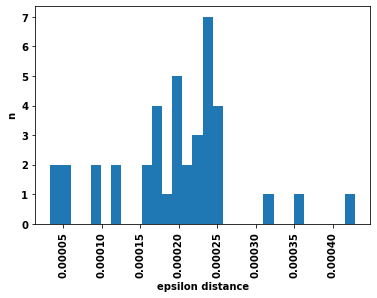

In [68]:
eps_dist = calculate_knn_distances(X)
plt.hist(eps_dist, bins=30)
plt.ylabel('n')
plt.xlabel('epsilon distance')
plt.xticks(rotation=90)
plt.show()

# Majority have their nearest neighbor at epsilon distance of 0.00025, so choose 0.00025 as eps distance

# Choosing eps
# https://stackoverflow.com/questions/12893492/choosing-eps-and-minpts-for-dbscan-r
# Plotting k-distance
# https://stackoverflow.com/questions/43160240/how-to-plot-a-k-distance-graph-in-python
# DBSCAN tutorial
# https://www.geeksforgeeks.org/implementing-dbscan-algorithm-using-sklearn/
# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

In [78]:
eps = 0.00025
min_samples = 2
metric = haversine_distances

db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
labels = db.labels_
labels

array([ 0,  1,  2,  2,  1, -1,  2,  3,  4,  3,  5,  6,  2,  5, -1,  0,  2,
        4,  2, -1,  1,  2, -1,  4,  3,  0,  3,  3,  7,  1,  1, -1, -1,  4,
        5,  5,  6,  3,  7], dtype=int64)

In [236]:
set(labels)

{-1, 0, 1}

In [238]:
color_list = ['r', 'g', 'b', 'c', 'm', 'y']

for label in set(labels):
    print(color_list[label])

r
g
y


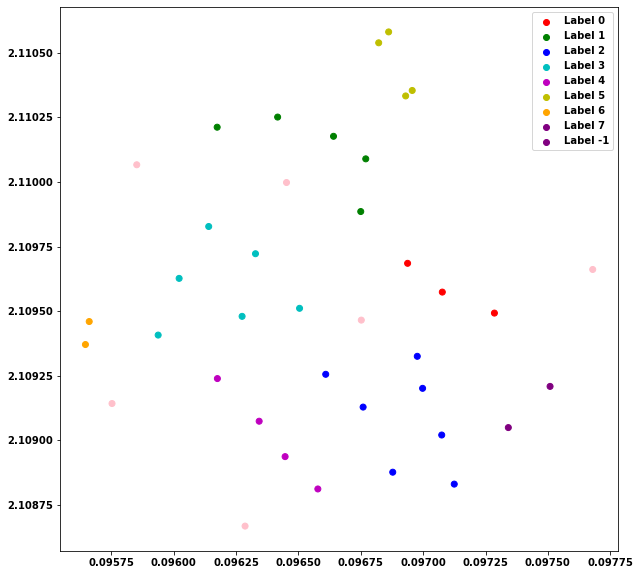

In [88]:
# Visualize clusters

# Map colors to labels
colors = {}
colors[0] = 'r'
colors[1] = 'g'
colors[2] = 'b'
colors[3] = 'c'
colors[4] = 'm'
colors[5] = 'y'
colors[6] = 'orange'
colors[7] = 'purple'
colors[-1] = 'pink'

color_vec = [colors[label] for label in labels]

# Legend
r = plt.scatter(X['lat'], X['lon'], color='r');
g = plt.scatter(X['lat'], X['lon'], color='g');
b = plt.scatter(X['lat'], X['lon'], color='b');
c = plt.scatter(X['lat'], X['lon'], color='c');
m = plt.scatter(X['lat'], X['lon'], color='m');
y = plt.scatter(X['lat'], X['lon'], color='y');
orange = plt.scatter(X['lat'], X['lon'], color='orange');
purple = plt.scatter(X['lat'], X['lon'], color='purple');
pink = plt.scatter(X['lat'], X['lon'], color='pink');
plt.close()

plt.figure(figsize=(10,10))
plt.scatter(X['lat'], X['lon'], c = color_vec)

plt.legend((r, g, b, c, m, y, orange, purple, purple, pink), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4',
           'Label 5', 'Label 6', 'Label 7', 'Label -1'));
plt.show()

## Municipality-level DBSCAN clustering using multiple features

In [94]:
def haversine_dist(x):
    return haversine_distances(x)

def euclidean_dist(x):
    return euclidean_distances(x)

In [192]:
X = brgy_df[brgy_df['PSGC_MUNI']=='PH156612000'][['lat','lon']]
X['lat'] = [radians(x) for x in X['lat']]
X['lon'] = [radians(x) for x in X['lon']]
X.head()

,lat,lon
399,0.096938,2.109685
401,0.096174,2.110212
402,0.097074,2.109021
403,0.096878,2.108877
404,0.096750,2.109886


In [235]:
X = brgy_df[brgy_df['PSGC_MUNI']=='PH156612000'][['lat','lon']]
X.reset_index(inplace=True, drop=True)

locations = pd.DataFrame()
locations['lat'] = [radians(x) for x in X['lat']]
locations['lon'] = [radians(x) for x in X['lon']]
#locations = pd.DataFrame([lat_in_rad, lon_in_rad])
locations.head()

,lat,lon
0,0.096938,2.109685
1,0.096174,2.110212
2,0.097074,2.109021
3,0.096878,2.108877
4,0.096750,2.109886


In [214]:
# Calculate distance of k nearest neighbor of each point
def calculate_knn_distances(X, compute_dist):
    
    n = X.shape[0]
    knn_distances = np.zeros((n, n))
    
    for i in range(n):        
        for j in range(n):
            knn_distances[i, j] = compute_dist([X.iloc[i], X.iloc[j]])[0,1] 
            # print(dist)
            #distances.append(dist[0,1])
        
        #distances.sort() # sort distances in ascending order
        # print(dist)
        #knn_distances.append(distances[1]) # distance to nearest point, distance at index 0 is distance with itself
    
    return knn_distances

In [215]:
calculate_knn_distances(X.head(), haversine_dist)

array([[0.        , 0.0009261 , 0.00067555, 0.00080703, 0.00027399],
       [0.0009261 , 0.        , 0.00148889, 0.00150411, 0.0006609 ],
       [0.00067555, 0.00148889, 0.        , 0.00024302, 0.00092023],
       [0.00080703, 0.00150411, 0.00024302, 0.        , 0.00101252],
       [0.00027399, 0.0006609 , 0.00092023, 0.00101252, 0.        ]])

In [135]:
X = brgy_df[brgy_df['PSGC_MUNI']=='PH156612000'][['lat','lon']]
X['lat'] = [radians(x) for x in X['lat']]
X['lon'] = [radians(x) for x in X['lon']]

In [216]:
# Get data

feat = ['BRGY_SCHOOLS', 'brgy_area', 'Total_under10', 'Total_10to20', 'Total_31to60']
brgy_df_feat = brgy_df[brgy_df['PSGC_MUNI']=='PH156612000'][feat]

# Scale features
scaled_brgy_df_feat = pd.DataFrame(scale(brgy_df_feat))

location = brgy_df[brgy_df['PSGC_MUNI']=='PH156612000'][['lat','lon']]
location['lat'] = [radians(x) for x in location['lat']]
location['lon'] = [radians(x) for x in location['lon']]
location = pd.DataFrame(location)

# Compute distance matrix for feat and location
dist_matrix_feat = calculate_knn_distances(scaled_brgy_df_feat, euclidean_dist)
dist_matrix_loc = calculate_knn_distances(location, haversine_dist)

In [217]:
len(dist_matrix_feat)

39

In [218]:
len(dist_matrix_loc)

39

In [219]:
# Combine feat and loc with weights
alpha = 2
beta = 1

dist_matrix += alpha * dist_matrix_loc
print(len(dist_matrix))
dist_matrix = beta * dist_matrix_feat
print(len(dist_matrix))
# dist_matrix

39
39


In [220]:
eps = 0.00025
min_samples = 4


db = DBSCAN(eps=eps, min_samples=min_samples)
db.fit_predict(dist_matrix)
labels = db.labels_
set(labels)

{-1}

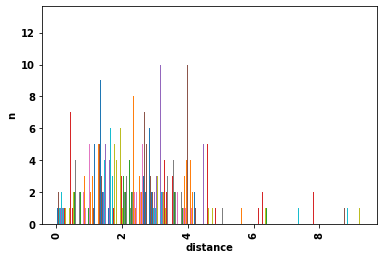

In [227]:
plt.hist(dist_matrix, bins=30)
plt.ylabel('n')
plt.xlabel('distance')
plt.xticks(rotation=90)
plt.show()

In [228]:
eps = 4
min_samples = 4


db = DBSCAN(eps=eps, min_samples=min_samples)
db.fit_predict(dist_matrix)
labels = db.labels_
set(labels)

{-1, 0, 1}

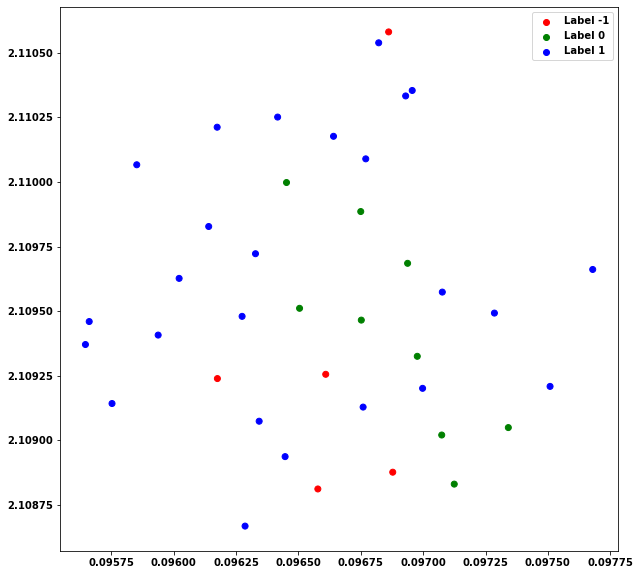

In [230]:
# Visualize clusters

# Map colors to labels
colors = {}
colors[-1] = 'r'
colors[0] = 'g'
colors[1] = 'b'

color_vec = [colors[label] for label in labels]

# Legend
r = plt.scatter(X['lat'], X['lon'], color='r');
g = plt.scatter(X['lat'], X['lon'], color='g');
b = plt.scatter(X['lat'], X['lon'], color='b');
plt.close()

plt.figure(figsize=(10,10))
plt.scatter(X['lat'], X['lon'], c = color_vec)

plt.legend((r, g, b), 
           ('Label -1', 'Label 0', 'Label 1'));
plt.show()

Spatial clustering resources:
- https://geodacenter.github.io/workbook/9a_spatial1/lab9a.html#including-geographical-coordinates-in-the-feature-set
- https://medium.com/@sylvainma/multi-feature-geo-clustering-with-dbscan-4857c6b932e2
- https://github.com/sylvainma/Explorify/blob/master/CODE/explorify/clustering/dbscan.py
- https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/